In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
abandono = pd.read_csv('churn.csv')
marketing = pd.read_csv('bank-additional-full.csv', sep=';')
depositos = pd.read_csv('train.csv') #el csv de test son valores repetidos de esta base de datos, por lo que estos no van a ser cargados.

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
abandono.duplicated().sum(), marketing.duplicated().sum(), depositos.duplicated().sum()

(0, 12, 0)

In [55]:
duplicados = marketing[marketing.duplicated(keep=False)]

In [56]:
duplicados.head(12) #se observa que los duplicados son exactos, de no ser por datos tan especificos como la duracion, el dia de la llamada, el mes y que hay varias variantes que son muy
#dificil que se repitan con esa exactitud, se podrian dejar los datos, pero lo mejor en estos casos es eliminar los duplicados.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [57]:
marketing.drop_duplicates(inplace=True)

In [58]:
len(abandono), len(marketing), len(depositos)
#hay una clara diferencia de cantidades en las 3 bases, sobre todo cuando estas se comparan con la base de abandono que son entre el 22% y 25% de las otras dos bases.

(10000, 41176, 45211)

# Churn

# Descripción de las Columnas

- **RowNumber**: Corresponde al número de registro (fila) y no tiene efecto en el resultado.

- **CustomerId**: Contiene valores aleatorios y no afecta la salida del cliente del banco.

- **Surname**: El apellido del cliente no tiene impacto en su decisión de dejar el banco.

- **CreditScore**: Puede tener un efecto en la pérdida de clientes, ya que un cliente con un puntaje de crédito más alto es menos probable que deje el banco. (suposición)

- **Geography**: La ubicación del cliente puede afectar su decisión de dejar el banco.

- **Gender**: Es interesante explorar si el género juega un papel en la salida del cliente del banco. 

- **Age**: Esto es ciertamente relevante, ya que los clientes mayores son menos propensos a dejar su banco que los más jóvenes.(suposición)

- **Tenure**: Se refiere al número de años que el cliente ha sido cliente del banco. Normalmente, los clientes más antiguos son más leales y menos propensos a dejar el banco.

- **Balance**: También es un muy buen indicador de la pérdida de clientes, ya que las personas con un saldo más alto en sus cuentas son menos propensas a dejar el banco en comparación con aquellas con saldos más bajos. (suposición)

- **NumOfProducts**: Se refiere al número de productos que un cliente ha adquirido a través del banco.

- **HasCrCard**: Indica si un cliente tiene o no una tarjeta de crédito. Esta columna también es relevante, ya que las personas con una tarjeta de crédito son menos propensas a dejar el banco. (suposición)

- **IsActiveMember**: Los clientes activos son menos propensos a dejar el banco. (suposición)

- **EstimatedSalary**: Al igual que con el saldo, las personas con salarios más bajos son más propensas a dejar el banco en comparación con aquellas con salarios más altos. (suposición)

- **Exited**: Indica si el cliente dejó o no el banco.


In [59]:
abandono.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
abandono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [61]:
#reduccion de espacio en memoria para aquellos valores numericos que no necesitan ser tan grandes ni actualmente ni en un futuro.
#tambien se cambiaran aquellas columnas que son detectadas como numericas pero realmente son categoricas para mejorar su manejo en pandas y optimizacion de futuros procesos.
abandono['NumOfProducts'] = abandono['NumOfProducts'].astype('uint8')
abandono['Tenure'] = abandono['Tenure'].astype('uint8')
abandono['CreditScore'] = abandono['CreditScore'].astype('uint16')
abandono['Exited'] = abandono['Exited'].astype('category')
abandono['IsActiveMember'] = abandono['IsActiveMember'].astype('category')
abandono['HasCrCard'] = abandono['HasCrCard'].astype('category')

In [62]:
abandono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  uint16  
 4   Geography        10000 non-null  object  
 5   Gender           10000 non-null  object  
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  uint8   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  uint8   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(3), object(3), uint16(1), uint8(2)
memory usage: 693.9+ KB


In [63]:
analisis_numerico = abandono[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]
analisis_numerico.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,100090.24
std,96.65,10.49,2.89,62397.41,0.58,57510.49
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,3.00,0.00,1.00,51002.11
50%,652.00,37.00,5.00,97198.54,1.00,100193.92
75%,718.00,44.00,7.00,127644.24,2.00,149388.25
max,850.00,92.00,10.00,250898.09,4.00,199992.48


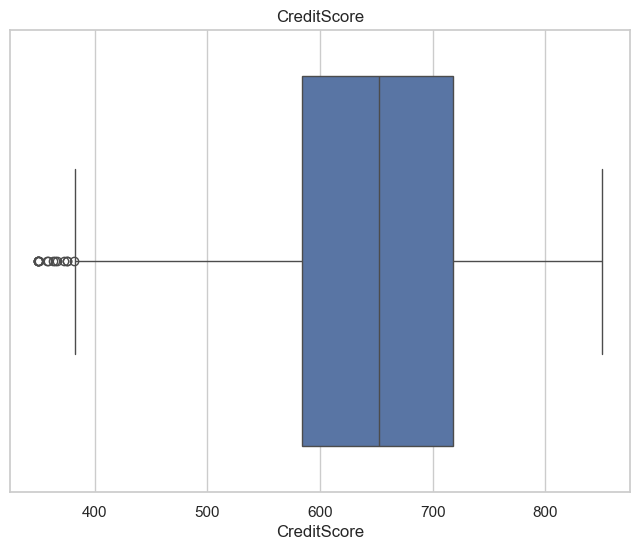

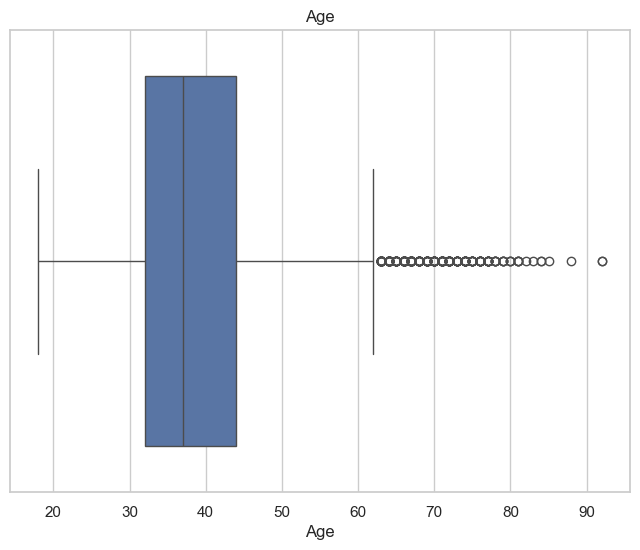

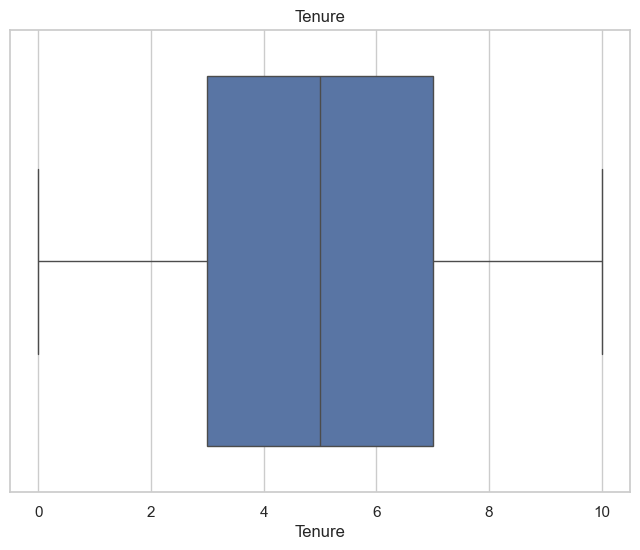

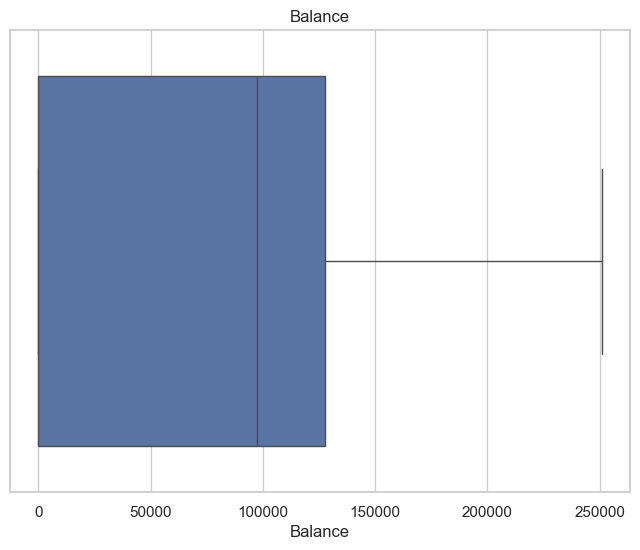

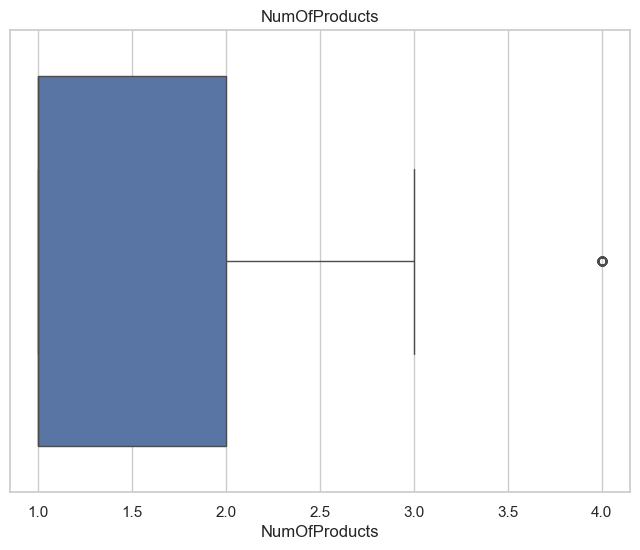

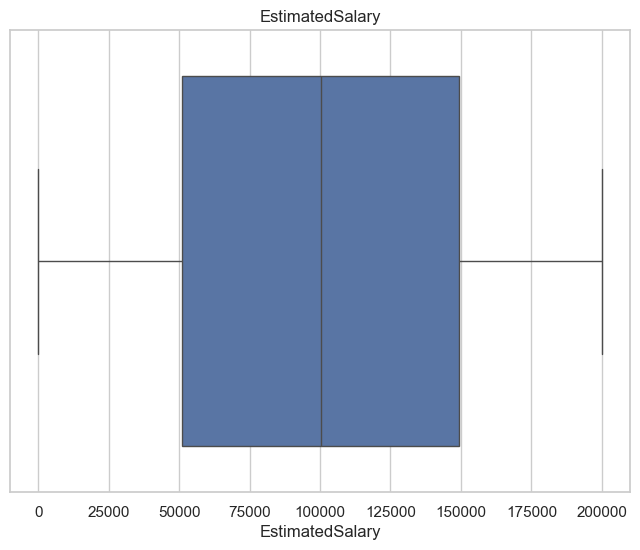

In [64]:
sns.set(style="whitegrid")

for column in analisis_numerico:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=abandono[column])
    plt.title(column)
    plt.xlabel(column)
    plt.show()


no se evidencia la presencia de outliers en nuestros datos, todo se encuentra entre los rangos normales, por lo que no se realizará un tratamiento de outliers en esta base de datos.

In [65]:
abandono.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
abandono.drop('RowNumber', axis=1, inplace=True)

In [67]:
abandono['HasCrCard'] = abandono['HasCrCard'].map({1:'Yes', 0:'No'})
abandono['IsActiveMember'] = abandono['IsActiveMember'].map({1:'Yes', 0:'No'})
abandono['Exited'] = abandono['Exited'].map({1:'Yes', 0:'No'})

In [68]:
abandono.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


# Marketing

### Variables de entrada:

#### Datos del cliente bancario:
1. **age** - Edad (numeric)
2. **job** - Tipo de trabajo (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
3. **marital** - Estado civil (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)
4. **education** - Nivel educativo (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
5. **default** - Tiene crédito en mora? (categorical: "no", "yes", "unknown")
6. **housing** - Tiene préstamo hipotecario? (categorical: "no", "yes", "unknown")
7. **loan** - Tiene préstamo personal? (categorical: "no", "yes", "unknown")

#### Relacionado con el último contacto de la campaña actual:
8. **contact** - Tipo de comunicación del contacto (categorical: "cellular", "telephone")
9. **month** - Último mes de contacto del año (categorical: "jan", "feb", "mar", …, "nov", "dec")
10. **day_of_week** - Último día de la semana de contacto (categorical: "mon", "tue", "wed", "thu", "fri")
11. **duration** - Duración del último contacto, en segundos (numeric). Nota importante: este atributo afecta significativamente el resultado de la salida (por ejemplo, si duración=0 entonces y="no"). Sin embargo, la duración no se conoce antes de realizar una llamada. Además, después del final de la llamada, y es obviamente conocido. Por lo tanto, este dato solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

#### Otros atributos:
12. **campaign** - Número de contactos realizados durante esta campaña y para este cliente (numeric, incluye el último contacto)
13. **pdays** - Número de días transcurridos desde que el cliente fue contactado por última vez en una campaña anterior (numeric; 999 significa que el cliente no fue contactado previamente)
14. **previous** - Número de contactos realizados antes de esta campaña y para este cliente (numeric)
15. **poutcome** - Resultado de la campaña de marketing anterior (categorical: "failure", "nonexistent", "success")

#### Atributos de contexto social y económico:
16. **emp.var.rate** - Tasa de variación del empleo - indicador trimestral (numeric)
17. **cons.price.idx** - Índice de precios al consumidor - indicador mensual (numeric)
18. **cons.conf.idx** - Índice de confianza del consumidor - indicador mensual (numeric)
19. **euribor3m** - Tasa Euribor a 3 meses - indicador diario (numeric)
20. **nr.employed** - Número de empleados - indicador trimestral (numeric)

### Variable de salida (objetivo deseado):

21. **y** - ¿El cliente ha suscrito un depósito a plazo? (binario: "yes", "no")


In [69]:
marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [70]:
marketing.rename(columns={'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx', 'cons.conf.idx':'cons_conf_idx', 'nr.employed':'nr_employed'}, inplace=True)

In [71]:
marketing['month #'] = pd.to_datetime(marketing['month'], format='%b').dt.month

In [72]:
marketing.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp_var_rate    41176 non-null  float64
 16  cons_price_idx  41176 non-null  float64
 17  cons_conf_idx   41176 non-null  floa

In [73]:
marketing['age'] = marketing['age'].astype('uint8')
marketing['duration'] = marketing['duration'].astype('uint16')
marketing['campaign'] = marketing['campaign'].astype('uint8')
marketing['pdays'] = marketing['pdays'].astype('uint16')
marketing['previous'] = marketing['previous'].astype('uint8')
marketing['emp_var_rate'] = marketing['emp_var_rate'].astype('float16')
marketing['cons_price_idx'] = marketing['cons_price_idx'].astype('float32')
marketing['cons_conf_idx'] = marketing['cons_conf_idx'].astype('float32')
marketing['euribor3m'] = marketing['euribor3m'].astype('float32')
marketing['nr_employed'] = marketing['nr_employed'].astype('float32')
marketing.rename(columns={'y':'deposit'}, inplace=True)

In [74]:
analisis_numerico_marketing = marketing[['age','duration','campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'euribor3m']]
analisis_numerico_marketing.describe().round(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,euribor3m
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,258.32,2.57,962.46,0.17,0.08,93.58,3.62
std,10.42,259.31,2.77,186.94,0.49,1.57,0.58,1.73
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,0.63
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.07,1.34
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,4.86
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,4.96
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,5.05


In [75]:
marketing_pdays = marketing[marketing['pdays'] != 999]

In [76]:
marketing_previous = marketing[marketing['previous'] != 0]

In [77]:
len(marketing_pdays)

1515

In [78]:
len(marketing_previous)

5625

In [79]:
marketing_pdays['pdays'].describe()

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64

In [80]:
marketing_previous['previous'].describe()

count    5625.000000
mean        1.266489
std         0.639158
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: previous, dtype: float64

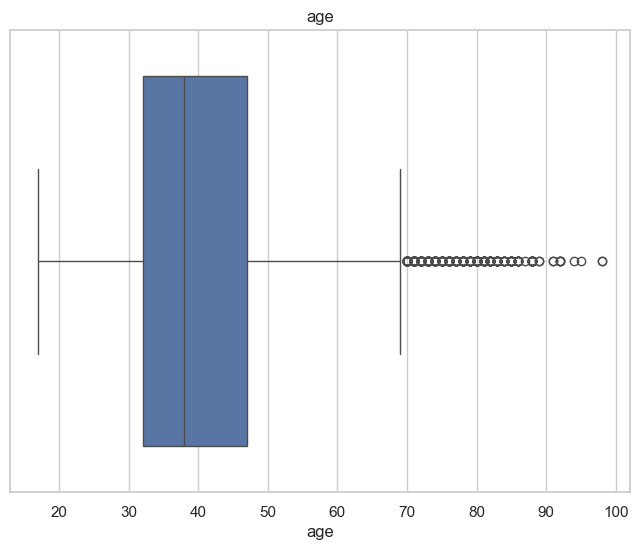

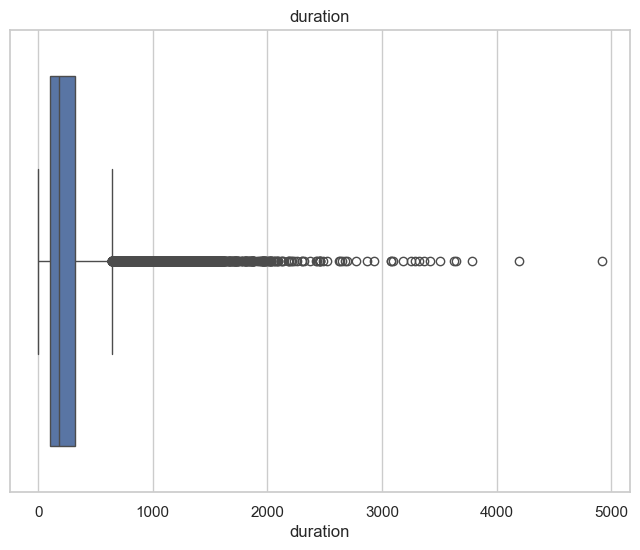

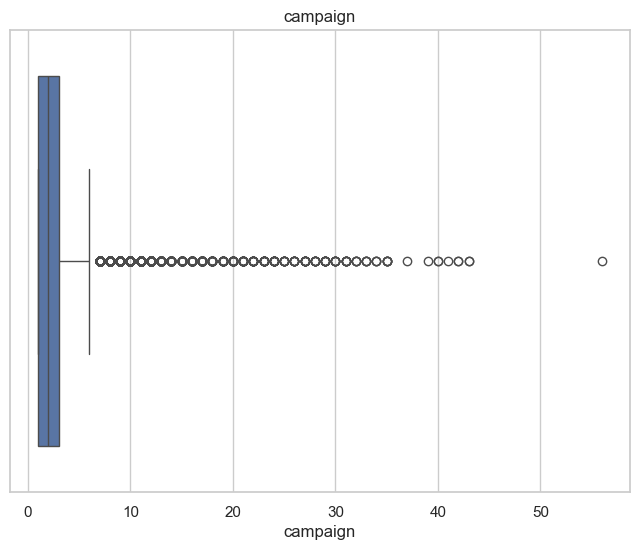

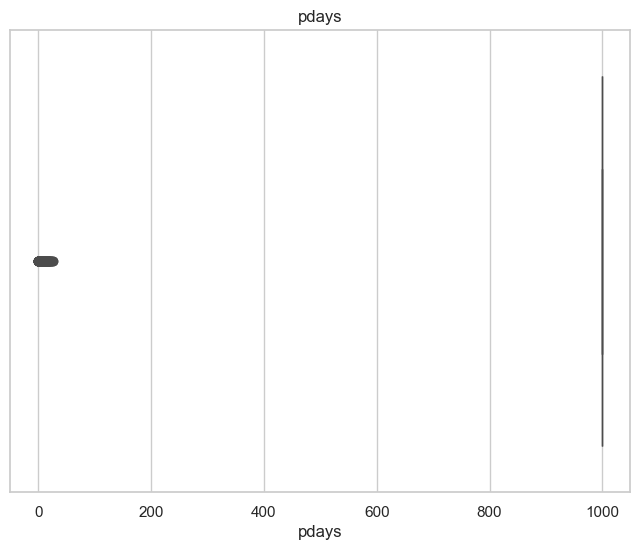

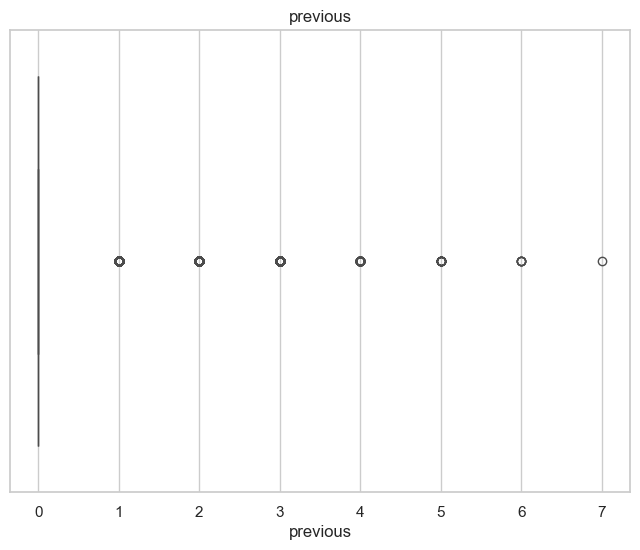

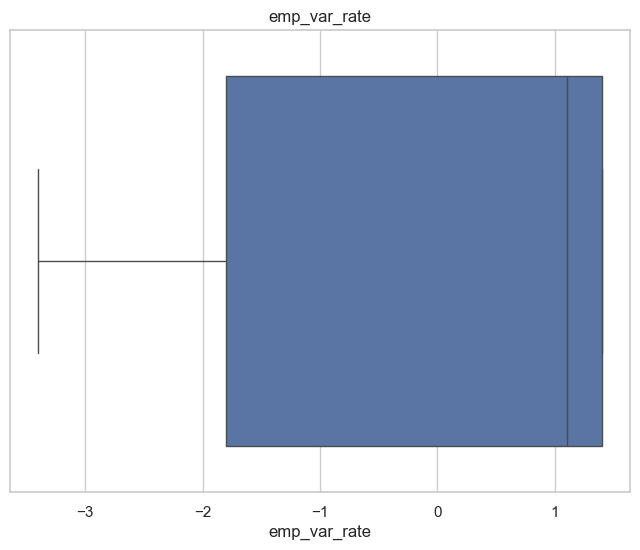

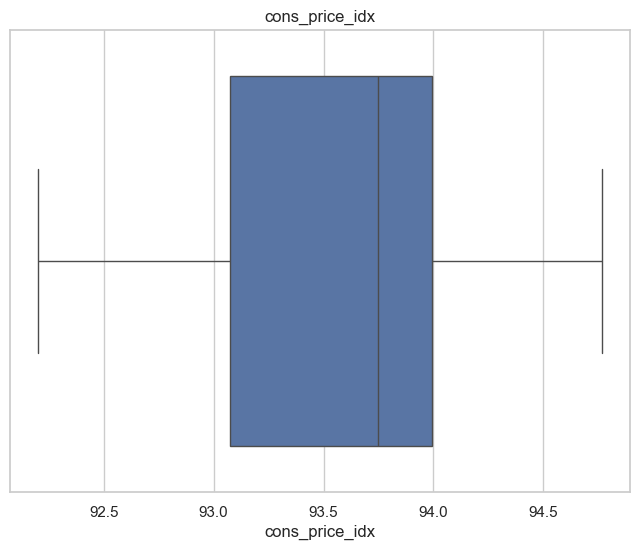

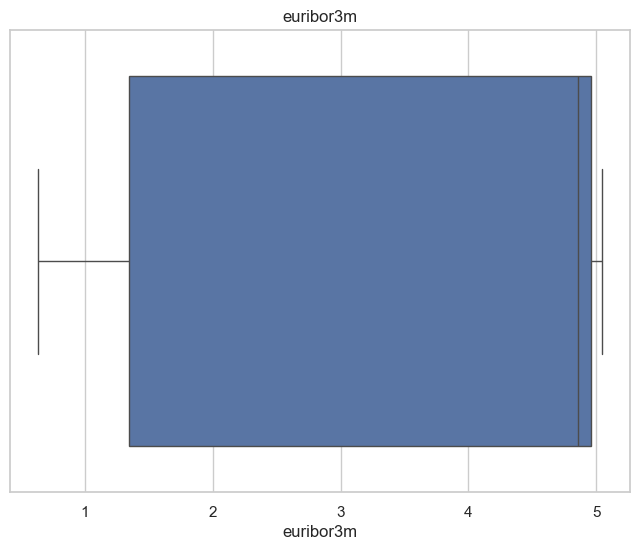

In [81]:
sns.set(style="whitegrid")

for column in analisis_numerico_marketing:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=marketing[column])
    plt.title(column)
    plt.xlabel(column)
    plt.show()

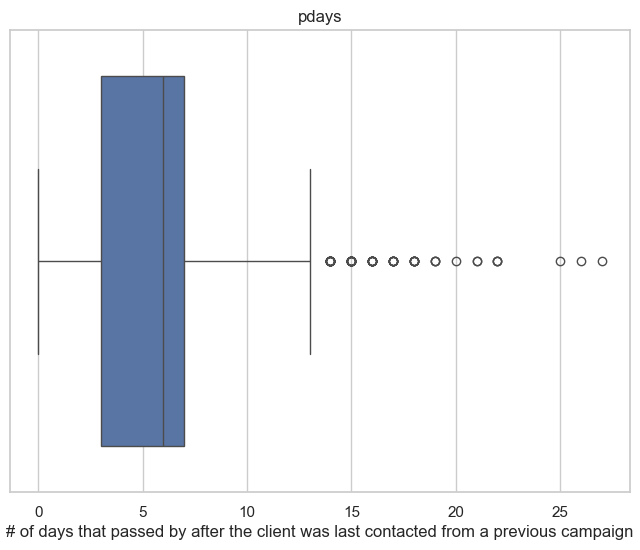

In [82]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x=marketing_pdays['pdays'])
plt.title('pdays')
plt.xlabel('# of days that passed by after the client was last contacted from a previous campaign')
plt.show()

In [83]:
marketing_pdays['pdays'].value_counts()

pdays
3     439
6     412
4     118
9      64
2      61
7      60
12     58
10     52
5      46
13     36
11     28
1      26
15     24
14     20
8      18
0      15
16     11
17      8
18      7
22      3
19      3
21      2
25      1
26      1
27      1
20      1
Name: count, dtype: int64

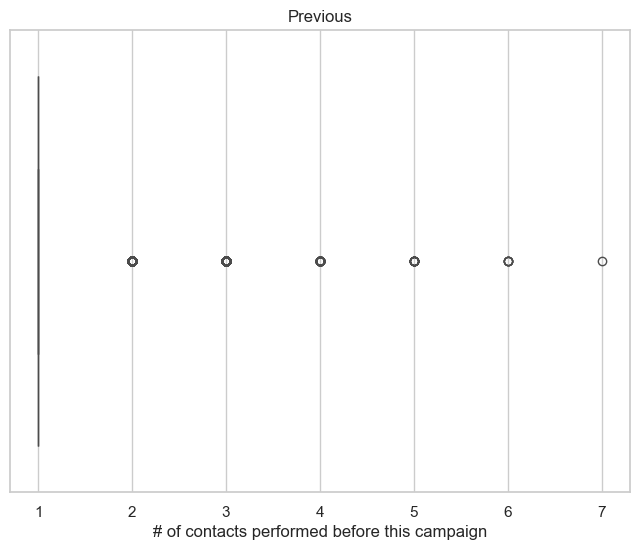

In [84]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x=marketing_previous['previous'])
plt.title('Previous')
plt.xlabel('# of contacts performed before this campaign')
plt.show()

In [85]:
marketing_previous['previous'].value_counts()

previous
1    4561
2     754
3     216
4      70
5      18
6       5
7       1
Name: count, dtype: int64

In [101]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  uint8  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  uint16 
 11  campaign        41176 non-null  uint8  
 12  pdays           41176 non-null  uint16 
 13  previous        41176 non-null  uint8  
 14  poutcome        41176 non-null  object 
 15  emp_var_rate    41176 non-null  float16
 16  cons_price_idx  41176 non-null  float32
 17  cons_conf_idx   41176 non-null  floa

# Tratamiento de Outliers

En este caso específico, los outliers no serán intervenidos, dado que provienen de tres momentos específicos de nuestra información:

1. **campaign**: Esta variable indica el número de veces que se ha contactado a un cliente en esta campaña. Es normal que existan valores altos y valores muy bajos en esta variable, ya que depende mucho del control específico del call center (o el medio de contacto). Cada uno maneja normas específicas de contacto. Por ejemplo, si el cliente es grosero en el primer contacto, se puede decidir no volver a contactarlo. Por el contrario, si el cliente no contesta, se puede decidir volver a contactarlo en un tiempo determinado. Por lo tanto, no se considera necesario intervenir esta variable.

2. **pdays**: Esta variable indica el número de días que han pasado desde el último contacto con el cliente. En este caso, existe un valor de 999 que indica que el cliente no ha sido contactado previamente. Al dejar de lado este valor, la cantidad de datos se reduce de 41188 a 1515. Dado que son muy pocos datos para realizar un tratamiento de outliers, lo mejor que se podría hacer en el caso de un análisis sensible a outliers es segmentar los datos en grupos para tener un mejor control sobre ellos.

3. **previous**: Esta variable indica el número de contactos realizados antes de esta campaña para este cliente. Más del 75% de los datos en esta variable son 0, por lo que al eliminarla nos quedamos con 5625 datos, que es casi el 14% de los datos originales. Esta reducción también afecta la cantidad de casos en los que se puede llegar a contactar a un cliente en diferentes campañas. Por lo tanto, no se considera necesario intervenir esta variable.


# Depositos

# Descripcion de las Columnas
- **Age**: La edad del cliente.
- **Job**: La ocupación del cliente.
- **Marital**: El estado civil del cliente.
- **Education**: El nivel educativo del cliente.
- **Default**: Indica si el cliente tiene o no créditos en mora.
- **Balance**: El saldo de la cuenta del cliente.
- **Housing**: Indica si el cliente tiene o no un préstamo de vivienda.
- **Contact**: El método utilizado para contactar al cliente (por ejemplo, teléfono, celular).
- **Day**: El día del mes en que se realizó el último contacto con los clientes.
- **Duration**: La duración (en segundos) del último contacto con los clientes durante una campaña.
- **Campaign**: Número de contactos realizados durante esta campaña para cada cliente.
- **pdays**: Número de días transcurridos desde el último contacto desde la campaña anterior.
- **previous** - Número de contactos realizados antes de esta campaña y para este cliente (numeric)
- **poutcome**: Resultado de la campaña de marketing anterior.
- **y** / **deposit** : Indica si el cliente ha suscrito un depósito a plazo.


In [86]:
depositos.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [87]:
depositos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [88]:
depositos['age'] = depositos['age'].astype('uint8')
depositos['day'] = depositos['day'].astype('uint8')
depositos['duration'] = depositos['duration'].astype('uint16')
depositos['campaign'] = depositos['campaign'].astype('uint8')
depositos['previous'] = depositos['previous'].astype('uint8')
depositos['date'] = pd.to_datetime(depositos['day'].astype(str) + '-' + depositos['month'], format='%d-%b').dt.strftime('%d-%m')
depositos.rename(columns={'y': 'deposit'}, inplace=True)
depositos['pdays'] = depositos['pdays'].replace(-1, 999)

In [89]:
depositos.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,999,0,unknown,no,05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,999,0,unknown,no,05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,999,0,unknown,no,05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,999,0,unknown,no,05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,999,0,unknown,no,05-05


In [91]:
analisis_numerico_depositos = depositos[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

In [92]:
analisis_numerico_depositos.describe().round(2)

,age,balance,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,258.16,2.76,857.57,0.57
std,10.62,3044.77,257.53,3.10,303.25,1.91
min,18.00,-8019.00,0.00,1.00,1.00,0.00
25%,33.00,72.00,103.00,1.00,999.00,0.00
50%,39.00,448.00,180.00,2.00,999.00,0.00
75%,48.00,1428.00,319.00,3.00,999.00,0.00
max,95.00,102127.00,4918.00,63.00,999.00,58.00


In [93]:
depositos_pdays = depositos[depositos['pdays'] != 999]

In [94]:
len(depositos_pdays)

8257

In [95]:
depositos_previous = depositos[depositos['previous'] != 0]

In [96]:
len(depositos_previous)

8257

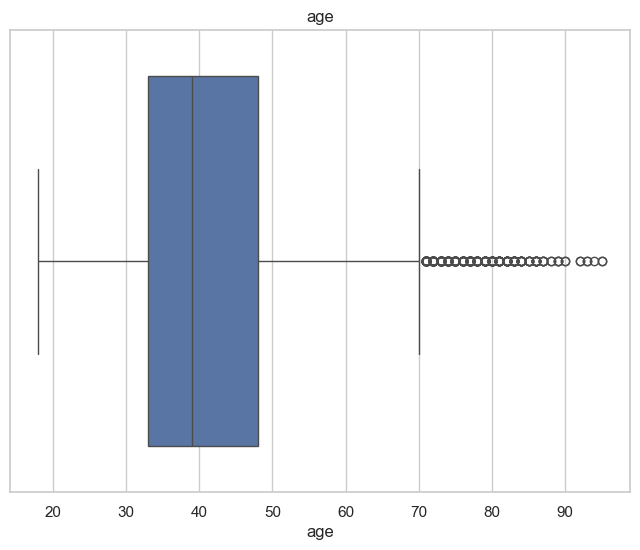

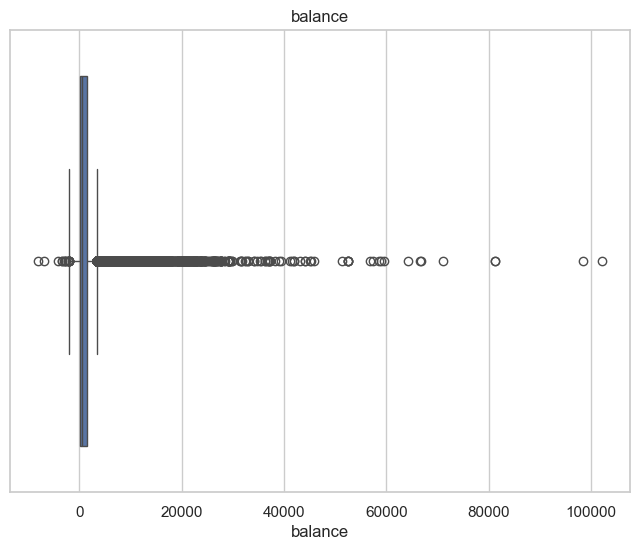

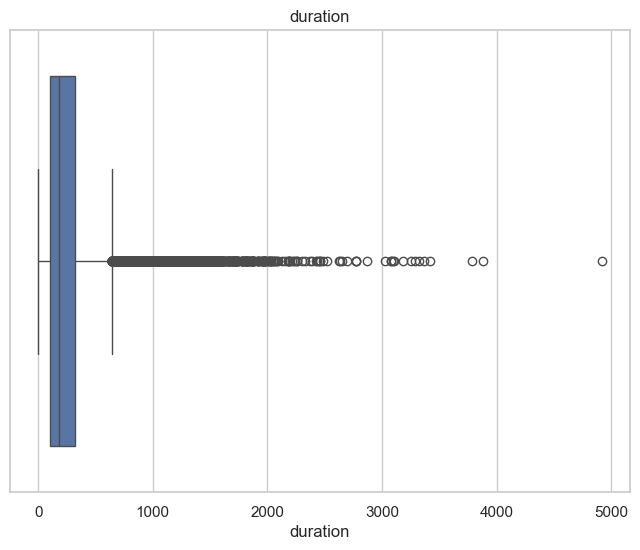

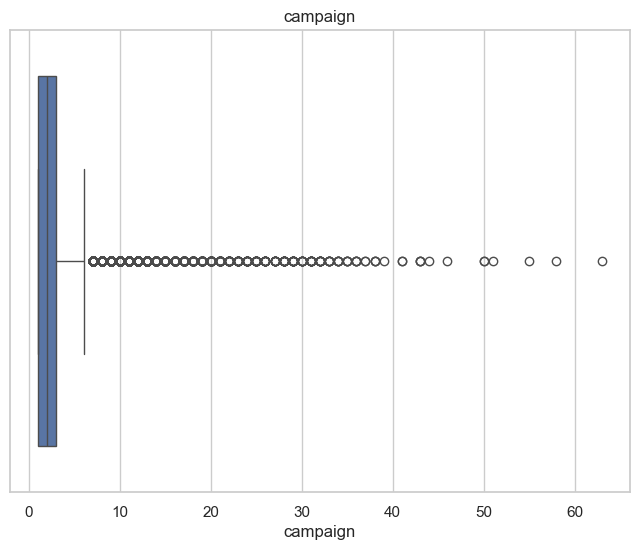

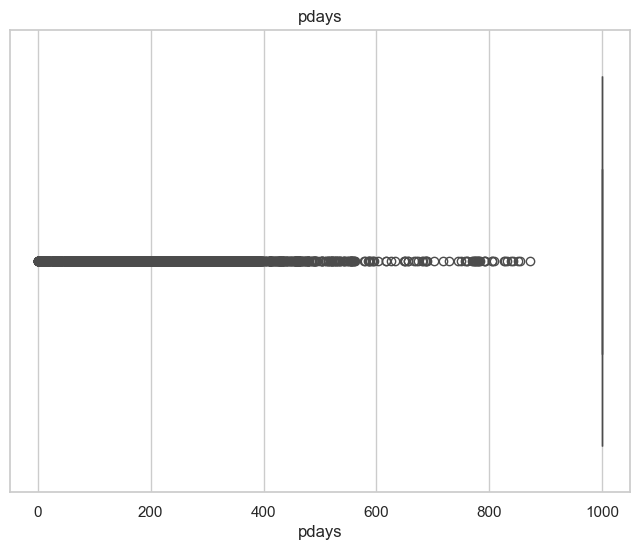

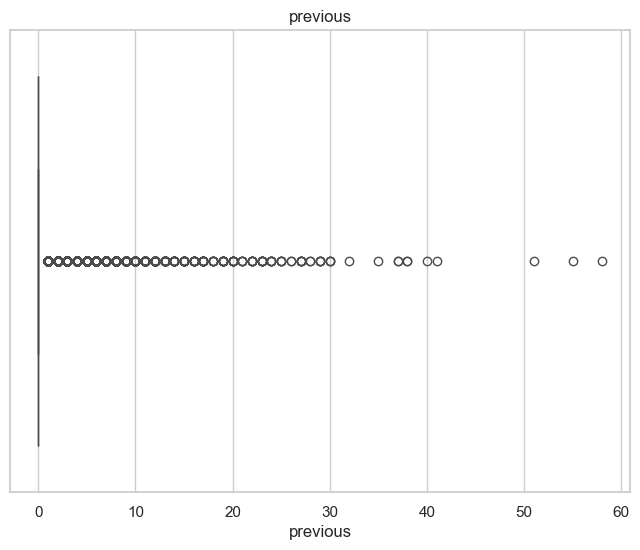

In [97]:
sns.set(style="whitegrid")

for column in analisis_numerico_depositos:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=depositos[column])
    plt.title(column)
    plt.xlabel(column)
    plt.show()

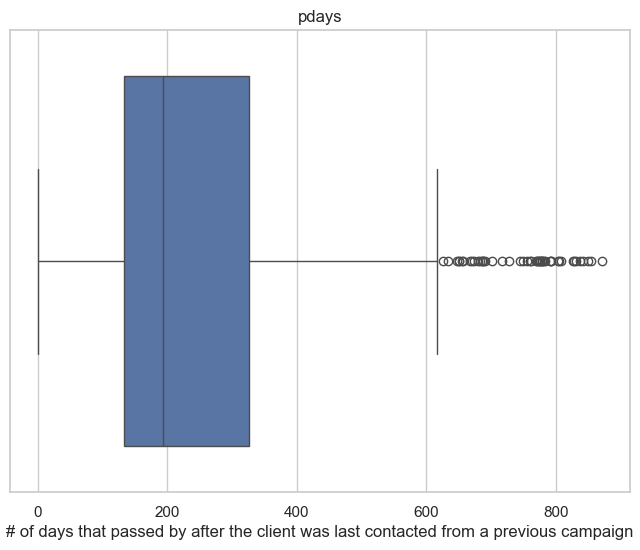

In [98]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=depositos_pdays['pdays'])
plt.title('pdays')
plt.xlabel('# of days that passed by after the client was last contacted from a previous campaign')
plt.show()

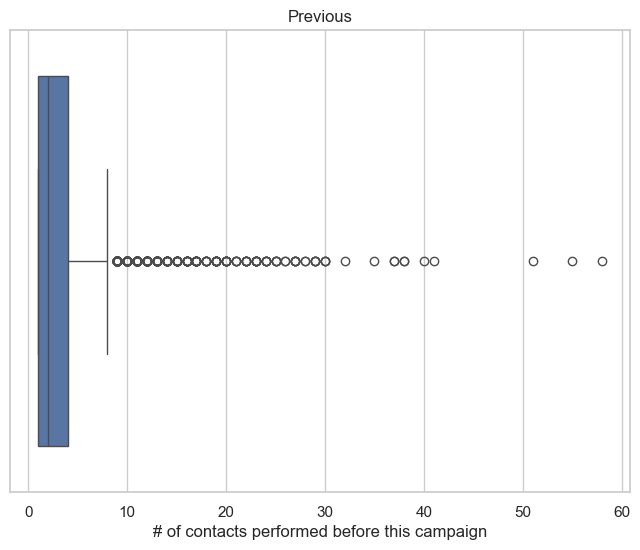

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=depositos_previous['previous'])
plt.title('Previous')
plt.xlabel('# of contacts performed before this campaign')
plt.show()

En este caso, los outliers tampoco serán intervenidos por la misma razón que en los datos anteriores, ya que comparten dos de esos momentos específicos. De igual manera, estos outliers estarán presentes a la hora de realizar un análisis más profundo.

# Guardar los datos limpios

In [100]:
# no vamos a sobreescribir los archivos originales, vamos a guardarlos con un nombre diferente para no perder la informacion original.
abandono.to_csv('churn_clean.csv', index=False)
marketing.to_csv('marketing_clean.csv', index=False)
depositos.to_csv('depositos_clean.csv', index=False)